# Main

In [2]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from datetime import datetime

import requests
from bs4 import BeautifulSoup
import re as re
import time
import pandas as pd
import numpy as np

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

from wordcloud import WordCloud
import matplotlib.pyplot as plt

## Webscrapping

### Importing BBC webscrapping

In [ ]:
import src.BBC_webscrapping as bbc

In [ ]:
df_bbc_russia = bbc.keyword('Russia',200)
df_bbc_china = bbc.keyword('China',200)

### Importing CNN webscrapping

In [ ]:
import src.CNN_webscrapping as cnn

In [ ]:
df_cnn_russia = cnn.keyword('Russia',200)
df_cnn_china = cnn.keyword('China',200)

### Importing Peoples's  Daily Online

In [ ]:
import src.peoples_webscrapping as pdo

In [ ]:
df_united_states = pdo.keyword('United States',60)
df_usa = pdo.keyword('USA',60)
df_uk = pdo.keyword('UK',60)
df_united_kingdom = pdo.keyword('United Kingdom',60)

In [ ]:
df_pd_us=pd.concat([df_united_states,df_usa])
df_pd_uk=pd.concat([df_uk,df_united_kingdom])

### Importing RT webscrapping

In [ ]:
import src.RT_webscrapping as rt

In [ ]:
df_united_states = rt.keyword('United States',100)
df_usa = rt.keyword('USA',100)
df_united_kingdom = rt.keyword('United Kingdom',100)
df_uk = rt.keyword('uk',100)

In [ ]:
df_rt_us= pd.concat([df_united_states,df_usa])
df_rt_uk=pd.concat([df_united_kingdom,df_uk])

### - not required- Saving raw data into CSV 

In [ ]:
df_bbc_china.to_csv('data/raw/bbc_china.csv',index=False) 
df_bbc_russia.to_csv('data/raw/bbc_russia.csv',index=False)
df_cnn_china.to_csv('data/raw/cnn_china.csv',index=False)
df_cnn_russia.to_csv('data/raw/cnn_russia.csv',index=False)
df_pd_us.to_csv('data/raw/pdo_united_states.csv',index=False)
df_pd_uk.to_csv('data/raw/pdo_united_kingdom.csv',index=False) 
df_rt_us.to_csv('data/raw/rt_united_states.csv',index=False)  
df_rt_uk.to_csv('data/raw/rt_united_kingdom.csv',index=False)  

## Natural Languaje, Subjectivity and Polarity analysis

### Importing functions

In [3]:
import src.NLTK_analysis as nk

### - Not required - Importing raw files

In [4]:
df_bbc_china=pd.read_csv('data/raw/bbc_china.csv')
df_bbc_russia=pd.read_csv('data/raw/bbc_russia.csv')
df_cnn_china=pd.read_csv('data/raw/cnn_china.csv')
df_cnn_russia=pd.read_csv('data/raw/cnn_russia.csv')
df_pd_us=pd.read_csv('data/raw/pdo_united_states.csv')
df_pd_uk=pd.read_csv('data/raw/pdo_united_kingdom.csv')
df_rt_us=pd.read_csv('data/raw/rt_united_states.csv')
df_rt_uk=pd.read_csv('data/raw/rt_united_kingdom.csv')

### Applying to BBC

- China

In [5]:
df_bbc_china = nk.preprocess(df_bbc_china)
df_bbc_china=nk.add_column(df_bbc_china,'source','bbc')
df_bbc_china=nk.add_column(df_bbc_china,'topic','china')
df_bbc_china.sample()

,title,article,link,day,month,year,word,subjetivity,polarity,date,source,topic
101,Li Qiang: China elects Xi Jinping ally as prem...,Li Qiang: China elects Xi Jinping ally as prem...,https://www.bbc.co.uk/news/world-asia-china-64...,11,3,2023,"[china, xi, li, party, president, qiang, jinpi...",0.269104,0.10017,11/3/2023,bbc,china


- Russia

In [6]:
df_bbc_russia = nk.preprocess(df_bbc_russia)
df_bbc_russia=nk.add_column(df_bbc_russia,'source','bbc')
df_bbc_russia=nk.add_column(df_bbc_russia,'topic','russia')
df_bbc_russia.sample()

,title,article,link,day,month,year,word,subjetivity,polarity,date,source,topic
75,US VP Harris: Russian actions in Ukraine 'crim...,US VP Harris: Russian actions in Ukraine ´crim...,https://www.bbc.co.uk/news/world-us-canada-646...,18,2,2023,"[ukraine, crimes, humanity, actions, days, har...",0.276984,-0.129365,18/2/2023,bbc,russia


### Applying to CNN

- China

In [7]:
df_cnn_china = nk.preprocess(df_cnn_china)
df_cnn_china=nk.add_column(df_cnn_china,'source','cnn')
df_cnn_china=nk.add_column(df_cnn_china,'topic','china')
df_cnn_china.sample()

,title,article,link,day,month,year,word,subjetivity,polarity,date,source,topic
92,Biden administration approves potential sale o...,Biden administration approves potential sale ...,https://www.cnn.com/2023/03/01/politics/us-f16...,1,3,2023,"[taiwan, defense, biden, missiles, united, air...",0.394035,0.11548,1/3/2023,cnn,china


- Russia

In [8]:
df_cnn_russia = nk.preprocess(df_cnn_russia)
df_cnn_russia=nk.add_column(df_cnn_russia,'source','cnn')
df_cnn_russia=nk.add_column(df_cnn_russia,'topic','russia')
df_cnn_russia.sample()

,title,article,link,day,month,year,word,subjetivity,polarity,date,source,topic
143,International Legion: Ukraine's foreign fighte...,International Legion: Ukraine's foreign fight...,https://www.cnn.com/2023/02/23/europe/ukraine-...,23,2,2023,"[mann, war, ukraine, vuhledar, ukrainian, figh...",0.340407,0.06253,23/2/2023,cnn,russia


### Applying to People's Daily Online

- United States of America

In [9]:
df_pd_us = nk.preprocess(df_pd_us)
df_pd_us=nk.add_column(df_pd_us,'source','pdo')
df_pd_us=nk.add_column(df_pd_us,'topic','usa')
df_pd_us.sample()

,title,article,link,day,month,year,word,subjetivity,polarity,date,source,topic
101,Much work remains to be done to tackle anti-As...,Much work remains to be done to tackle anti-As...,http://english.people.com.cn/n3/2023/0208/c900...,8,2,2023,"[asian, hate, americans, united, states, crime...",0.400927,-0.091426,8/2/2023,pdo,usa


- United Kingdom

In [10]:
df_pd_uk = nk.preprocess(df_pd_uk)
df_pd_uk=nk.add_column(df_pd_uk,'source','pdo')
df_pd_uk=nk.add_column(df_pd_uk,'topic','uk')
df_pd_uk.sample()

,title,article,link,day,month,year,word,subjetivity,polarity,date,source,topic
79,Orderly recovery of outbound tourism boosts gl...,Orderly recovery of outbound tourism boosts gl...,http://english.people.com.cn/n3/2023/0213/c900...,13,2,2023,"[tourism, china, tourists, thailand, recovery,...",0.341284,0.182149,13/2/2023,pdo,uk


### Applying to RT

- United States of America

In [11]:
df_rt_us = nk.preprocess(df_rt_us)
df_rt_us=nk.add_column(df_rt_us,'source','rt')
df_rt_us=nk.add_column(df_rt_us,'topic','usa')
df_rt_us.sample()

,title,article,link,year,month,day,word,subjetivity,polarity,date,source,topic
12,Zelensky threatens unsupportive Americans — RT...,Zelensky threatens unsupportive Americ...,https://www.rt.com/news/572077-zelensky-warns-...,2023,2,25,"[ukraine, lose, zelensky, americans, declared,...",0.350265,0.07619,25/2/2023,rt,usa


- United Kingdom

In [12]:
df_rt_uk = nk.preprocess(df_rt_uk)

df_rt_uk=nk.add_column(df_rt_uk,'source','rt')
df_rt_uk=nk.add_column(df_rt_uk,'topic','uk')
df_rt_uk.sample()

,title,article,link,year,month,day,word,subjetivity,polarity,date,source,topic
4,China is approaching a turning point in its hi...,China is approaching a turning point i...,https://www.rt.com/news/564589-china-is-approa...,2022,10,15,"[china, russia, xi, congress, party, beijing, ...",0.367393,0.066199,15/10/2022,rt,uk


### Saving all the DF's in one for visualisation

In [13]:
df_together = pd.concat([df_bbc_china,df_bbc_russia,df_cnn_china,df_cnn_russia,df_pd_us,df_pd_uk,df_rt_us, df_rt_uk])
df_words = nk.list_words(df_together)

In [14]:
df_together.to_csv('data/dfcomplete.csv',index=False)
df_words.to_csv ('data/words.csv',index=False)

### wordcloud

In [21]:
import src.wordcloud as wc

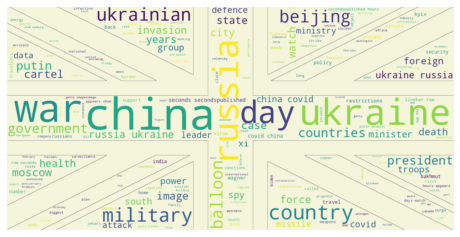

In [22]:
df_bbc=pd.concat([df_bbc_russia,df_bbc_china])
bbc_pic=wc.wordcloud(df_bbc,'uk.png')

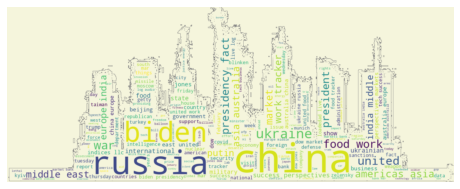

In [34]:
df_cnn=pd.concat([df_cnn_russia,df_cnn_china])
wc.wordcloud(df_cnn,'usa.png')

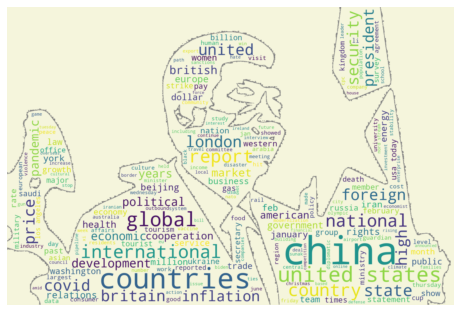

In [27]:
df_pd=pd.concat([df_pd_uk,df_pd_us])
wc.wordcloud(df_pd,'china.png')

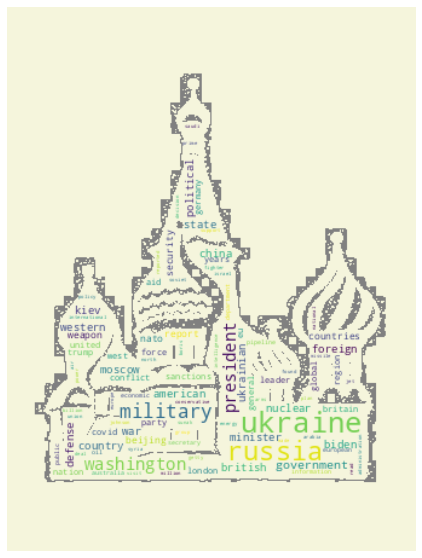

In [32]:
df_rt=pd.concat([df_rt_uk,df_rt_us])
wc.wordcloud(df_rt,'russia.png')

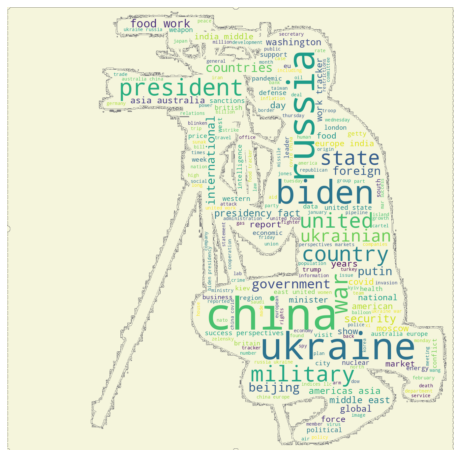

In [35]:
wc.wordcloud(df_together,'press.png')